In [169]:
from qiskit import *
from qiskit.visualization import *
two_moons = QuantumCircuit(2, 2)

In [170]:
two_moons.x([0,1])
two_moons.measure([0,1], [0,1])
# theif_test magic :<
with two_moons.if_test((two_moons.cregs[0], 1)) as else_:
    two_moons.x(1)
with else_:
    two_moons.x(0)

two_moons.draw()

┌───┐┌─┐   ┌──────────┐
q_0: ┤ X ├┤M├───┤0         ├
     ├───┤└╥┘┌─┐│          │
q_1: ┤ X ├─╫─┤M├┤1         ├
     └───┘ ║ └╥┘│  If_else │
c_0: ══════╩══╬═╡0         ╞
              ║ │          │
c_1: ═════════╩═╡1         ╞
                └──────────┘

In [171]:
# teleportation protocol to transfer the 1 state.

serene = QuantumCircuit(2, name='teleportation')
two_sere = QuantumCircuit(4)
two_sere.compose(two_moons, [0,1], inplace=True)
two_sere.compose(serene, [2,3], inplace=True)

two_sere.h(2)
two_sere.cx(2,3)
two_sere.cx(1,2)
two_sere.h(1)
two_sere.barrier()
two_sere.cx(2,3)
two_sere.cz(1,3)

# add a classical bit to the [3] qubit
creg = ClassicalRegister(1, name='vip')
two_sere.add_register(creg)

two_sere.measure(3, creg[0])
two_sere.draw()

┌───┐┌─┐        ┌──────────┐           ░            
q_0: ┤ X ├┤M├────────┤0         ├───────────░────────────
     ├───┤└╥┘┌─┐     │          │     ┌───┐ ░            
q_1: ┤ X ├─╫─┤M├─────┤1         ├──■──┤ H ├─░───────■────
     ├───┤ ║ └╥┘     │          │┌─┴─┐└───┘ ░       │    
q_2: ┤ H ├─╫──╫───■──┤          ├┤ X ├──────░───■───┼────
     └───┘ ║  ║ ┌─┴─┐│  If_else │└───┘      ░ ┌─┴─┐ │ ┌─┐
q_3: ──────╫──╫─┤ X ├┤          ├───────────░─┤ X ├─■─┤M├
           ║  ║ └───┘│          │           ░ └───┘   └╥┘
c_0: ══════╩══╬══════╡0         ╞══════════════════════╬═
              ║      │          │                      ║ 
c_1: ═════════╩══════╡1         ╞══════════════════════╬═
                     └──────────┘                      ║ 
vip: ══════════════════════════════════════════════════╩═

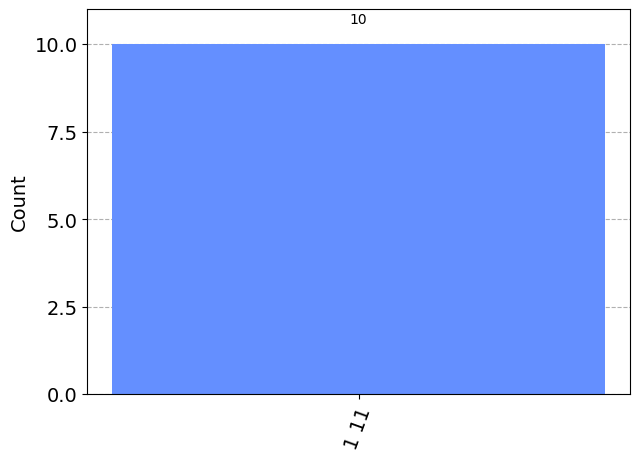

In [172]:
# visualize result (plot histogram)
qasm = Aer.get_backend('qasm_simulator')

basis_gates = ['u3', 'cx', 'reset', 'measure', 'if_else', 'barrier']

execution_config = {
    'basis_gates': basis_gates
}

eyesight = execute(two_sere, backend=qasm, basis_gates=basis_gates, shots=10).result()

counts = eyesight.get_counts()
plot_histogram(counts)

In [173]:
# print out the result
print(counts)

{'1 11': 10}


In [174]:
# statevector result
sv = Aer.get_backend('statevector_simulator')

# basically; those are gates which are automatically applied on the if_test method and we need to import them so the simulator will count them on
basis_gates = ['u3', 'cx', 'reset', 'measure', 'if_else', 'barrier']

execution_config = {
    'basis_gates': basis_gates
}

corridors = execute(two_sere, backend=sv, basis_gates=basis_gates).result()
bed = corridors.get_statevector(two_sere)
bed_v2 = [bed[12], bed[13], bed[14], bed[15]]
print(bed_v2)



[(0.5+2.1431318985078685e-16j), (-3.0616169978683836e-17-1.3122898098291257e-32j), (0.5+2.1431318985078685e-16j), (-3.0616169978683836e-17-1.3122898098291257e-32j)]
